In [2]:
#import packages
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import glob
import shutil
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:

#Splitting the data

# Defining the path to dataset
dataset_path = '/kaggle/input/plantdisease/PlantVillage'

train_ratio = 0.75
valid_ratio = 0.10
test_ratio = 0.15

# The path to the output directory
output_path = '/kaggle/working/PVdatasetsplit/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Defining the names of the subdirectories for each set
train_dir = 'train'
valid_dir = 'valid'
test_dir = 'test'

# Creating the subdirectories for each set
os.makedirs(os.path.join(output_path, train_dir))
os.makedirs(os.path.join(output_path, valid_dir))
os.makedirs(os.path.join(output_path, test_dir))

# Loop over each class in the dataset
classes = os.listdir(dataset_path)
for cls in classes:
    # Create the subdirectories for each class in each set
    os.makedirs(os.path.join(output_path, train_dir, cls))
    os.makedirs(os.path.join(output_path, valid_dir, cls))
    os.makedirs(os.path.join(output_path, test_dir, cls))

    # Get the list of images for this class
    images = os.listdir(os.path.join(dataset_path, cls))
    num_images = len(images)

    # Shuffle the images
    random.shuffle(images)

    # Split the images into sets
    num_train = int(train_ratio * num_images)
    num_valid = int(valid_ratio * num_images)
    num_test = int(test_ratio * num_images)

    train_images = images[:num_train]
    valid_images = images[num_train:num_train+num_valid]
    test_images = images[num_train+num_valid:]

    # Copy the images to the corresponding subdirectories for each set
    for img in train_images:
        src_path = os.path.join(dataset_path, cls, img)
        print(img)
        dst_path = os.path.join(output_path, train_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in valid_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, valid_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in test_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, test_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

4c664b0a-9ee7-48c2-aaf4-d54e34f5edd3___JR_B.Spot 9060.JPG
96f532cf-0f68-421f-824e-4bc6e1dc6925___JR_B.Spot 3168.JPG
a72dbf23-65d1-40c6-a7bc-82caed00c6d3___JR_B.Spot 3333.JPG
0a4c007d-41ab-4659-99cb-8a4ae4d07a55___NREC_B.Spot 1954.JPG
bf437495-ab1b-459e-8173-6619a07ee8c6___JR_B.Spot 3139.JPG
3ff12256-cb79-4a74-8c2f-2df51b31d646___NREC_B.Spot 9242.JPG
79264de2-10b4-4b3d-a3fe-42916a666bcb___NREC_B.Spot 9239.JPG
35ef7246-60e5-4bcc-bc1f-020eac1eacc2___JR_B.Spot 3298.JPG
ac6e6cad-2932-4af0-ad68-fdf044eecc8c___NREC_B.Spot 1796.JPG
5528b2f7-3c8f-4c20-8fdc-5fa996e9a637___JR_B.Spot 3236.JPG
2c4a898a-9812-423b-bd8a-419a09699270___JR_B.Spot 8853.JPG
4a18013a-dcd1-4974-b841-89c49b198a11___NREC_B.Spot 1984.JPG
4cf90b49-1b89-422e-84ae-2e2fcfc2fa02___JR_B.Spot 3362.JPG
06d752a4-d4a5-439e-b374-231a2cc64032___NREC_B.Spot 1868.JPG
7c481317-04e6-472c-a83b-39acb18631a3___JR_B.Spot 8999.JPG
ac4d5f77-f965-4118-9608-3a2879d36f56___JR_B.Spot 3296.JPG
21f7119e-d926-4be3-9ace-d6b26b280e64___JR_B.Spot 8837.JPG
01

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip the images horizontally
    transforms.RandomRotation(10),  # Randomly rotate the images by up to 10 degrees
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
    transforms.Normalize(  # Normalize the images
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load the dataset
train_dataset = ImageFolder('/kaggle/working/PVdatasetsplit/train', transform=transform)
test_dataset = ImageFolder('/kaggle/working/PVdatasetsplit/test', transform=transform)
val_dataset = ImageFolder('/kaggle/working/PVdatasetsplit/valid', transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

In [5]:
print(len(train_loader))
print(len(test_loader))
print(len(val_loader))

242
49
33


In [6]:

# Define the model architecture
model = models.resnet18(weights=None)
model.classifier = nn.Sequential(
    nn.Linear(1280, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 15)
)




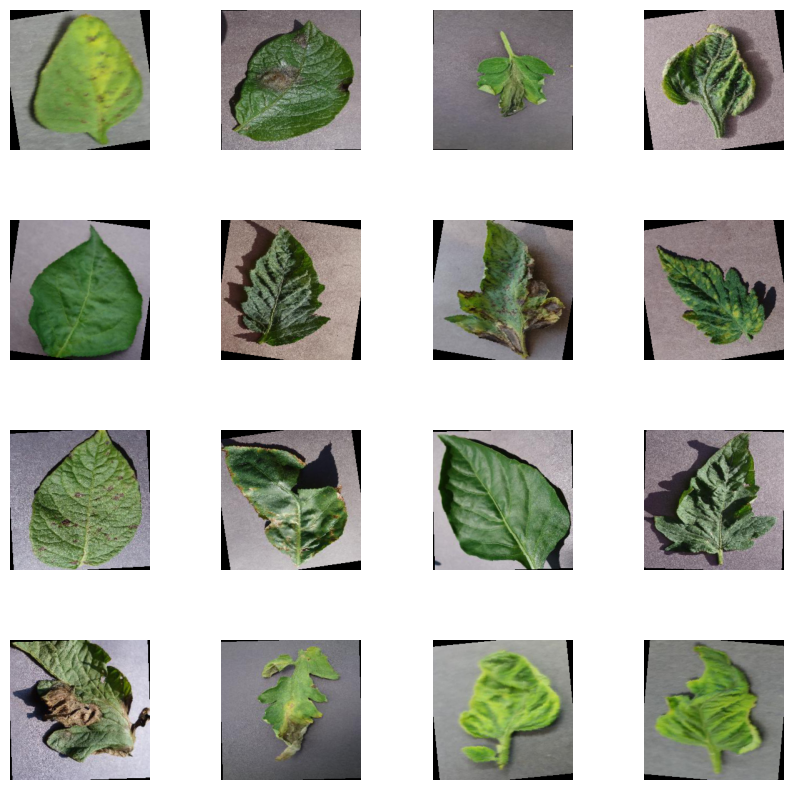

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Get a batch of images from the train loader
images, labels = next(iter(train_loader))

# Convert the PyTorch tensor to a NumPy array
images = images.numpy()

# Convert the NumPy array to a PyTorch tensor
images = torch.from_numpy(images)

# Denormalize the images
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
images = images.permute(0, 2, 3, 1)  # Change the order of the dimensions
images = std * images + mean

# Create a figure with 4x4 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5) # Adjust subplot parameters
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(images[i])
    ax.axis('off')
plt.show()




In [8]:
import wandb
wandb.login()
#ec0fa02abb6680e2e41f9e94ffb3c3a636ca9007

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [9]:
config={
    'device' : 'cuda',
    'epochs' : 20,
    'optimizer' : 'Adam',
    'lr' : 0.001,
    'batch_size' : 64,
    'number_of_classes' : 15,
    'loss_function' : 'CrossEntropy'
    
}

In [10]:
run = wandb.init(project="Dataset_2v2", config=config,name = 'resnet18')

wandb: Currently logged in as: prvns1997 (p1). Use `wandb login --relogin` to force relogin


In [11]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# Move model to the device
model = model.to(device)

# Define the number of epochs to train for
num_epochs = 20

# Create lists to store train and validation loss and accuracy
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

# Train the model
for epoch in range(1, num_epochs+1):
    # Set the model to training mode
    model.train()
    train_loss = 0
    total_train_images = 0
    total_train_correct = 0

    # Loop over the training dataset in batches
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch}/{num_epochs}'):
        # Move data to the device
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate training loss and accuracy
        train_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_images += labels.size(0)

    # Calculate training accuracy
    train_acc = total_train_correct / total_train_images

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        total_val_loss = 0
        total_val_correct = 0
        total_val_images = 0
        for images, labels in val_loader:
            # Move data to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item() * labels.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val_correct += (predicted == labels).sum().item()
            total_val_images += labels.size(0)
        val_acc = total_val_correct / total_val_images
        print('Epoch [{}/{}], Training Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%'
              .format(epoch, num_epochs, train_loss/len(train_loader.dataset), train_acc*100, total_val_loss/len(val_loader.dataset), val_acc*100))
        wandb.log({'Training Loss':( train_loss/len(train_loader.dataset)),' Training Accuracy':train_acc, 'Validation Loss': (total_val_loss/len(val_loader.dataset)),'Validation Accuracy':val_acc})

    # Append training and validation metrics to the corresponding lists
    train_loss_list.append(train_loss/len(train_loader.dataset))
    train_acc_list.append(train_acc*100)
    val_loss_list.append(total_val_loss/len(val_loader.dataset))
    val_acc_list.append(val_acc*100)

Training on device cuda.


Epoch 1/20: 100%|██████████| 242/242 [01:31<00:00,  2.65it/s]


Epoch [1/20], Training Loss: 1.0409, Training Accuracy: 66.95%, Validation Loss: 1.0087, Validation Accuracy: 68.66%


Epoch 2/20: 100%|██████████| 242/242 [01:21<00:00,  2.98it/s]


Epoch [2/20], Training Loss: 0.5148, Training Accuracy: 82.97%, Validation Loss: 0.9218, Validation Accuracy: 70.80%


Epoch 3/20: 100%|██████████| 242/242 [01:21<00:00,  2.97it/s]


Epoch [3/20], Training Loss: 0.3733, Training Accuracy: 87.40%, Validation Loss: 0.4035, Validation Accuracy: 86.39%


Epoch 4/20: 100%|██████████| 242/242 [01:21<00:00,  2.98it/s]


Epoch [4/20], Training Loss: 0.2984, Training Accuracy: 89.64%, Validation Loss: 0.3216, Validation Accuracy: 88.78%


Epoch 5/20: 100%|██████████| 242/242 [01:20<00:00,  2.99it/s]


Epoch [5/20], Training Loss: 0.2435, Training Accuracy: 91.92%, Validation Loss: 0.2626, Validation Accuracy: 90.86%


Epoch 6/20: 100%|██████████| 242/242 [01:21<00:00,  2.97it/s]


Epoch [6/20], Training Loss: 0.2075, Training Accuracy: 92.85%, Validation Loss: 0.2317, Validation Accuracy: 92.13%


Epoch 7/20: 100%|██████████| 242/242 [01:21<00:00,  2.97it/s]


Epoch [7/20], Training Loss: 0.1655, Training Accuracy: 94.23%, Validation Loss: 0.1938, Validation Accuracy: 93.44%


Epoch 8/20: 100%|██████████| 242/242 [01:21<00:00,  2.96it/s]


Epoch [8/20], Training Loss: 0.1539, Training Accuracy: 94.84%, Validation Loss: 0.2696, Validation Accuracy: 91.35%


Epoch 9/20: 100%|██████████| 242/242 [01:23<00:00,  2.91it/s]


Epoch [9/20], Training Loss: 0.1403, Training Accuracy: 95.16%, Validation Loss: 0.2289, Validation Accuracy: 92.52%


Epoch 10/20: 100%|██████████| 242/242 [01:20<00:00,  2.99it/s]


Epoch [10/20], Training Loss: 0.1184, Training Accuracy: 96.05%, Validation Loss: 0.3203, Validation Accuracy: 90.28%


Epoch 11/20: 100%|██████████| 242/242 [01:21<00:00,  2.98it/s]


Epoch [11/20], Training Loss: 0.1011, Training Accuracy: 96.61%, Validation Loss: 0.1720, Validation Accuracy: 94.46%


Epoch 12/20: 100%|██████████| 242/242 [01:21<00:00,  2.99it/s]


Epoch [12/20], Training Loss: 0.1093, Training Accuracy: 96.14%, Validation Loss: 0.1105, Validation Accuracy: 96.26%


Epoch 13/20: 100%|██████████| 242/242 [01:21<00:00,  2.97it/s]


Epoch [13/20], Training Loss: 0.0924, Training Accuracy: 96.85%, Validation Loss: 0.1352, Validation Accuracy: 95.87%


Epoch 14/20: 100%|██████████| 242/242 [01:21<00:00,  2.96it/s]


Epoch [14/20], Training Loss: 0.0821, Training Accuracy: 97.23%, Validation Loss: 0.1682, Validation Accuracy: 94.85%


Epoch 15/20: 100%|██████████| 242/242 [01:21<00:00,  2.97it/s]


Epoch [15/20], Training Loss: 0.0883, Training Accuracy: 96.85%, Validation Loss: 0.1975, Validation Accuracy: 92.66%


Epoch 16/20: 100%|██████████| 242/242 [01:21<00:00,  2.98it/s]


Epoch [16/20], Training Loss: 0.0728, Training Accuracy: 97.46%, Validation Loss: 0.1434, Validation Accuracy: 94.70%


Epoch 17/20: 100%|██████████| 242/242 [01:20<00:00,  2.99it/s]


Epoch [17/20], Training Loss: 0.0649, Training Accuracy: 97.73%, Validation Loss: 0.3290, Validation Accuracy: 92.32%


Epoch 18/20: 100%|██████████| 242/242 [01:21<00:00,  2.99it/s]


Epoch [18/20], Training Loss: 0.0704, Training Accuracy: 97.56%, Validation Loss: 0.1688, Validation Accuracy: 94.51%


Epoch 19/20: 100%|██████████| 242/242 [01:21<00:00,  2.98it/s]


Epoch [19/20], Training Loss: 0.0648, Training Accuracy: 97.73%, Validation Loss: 0.1155, Validation Accuracy: 96.06%


Epoch 20/20: 100%|██████████| 242/242 [01:21<00:00,  2.97it/s]


Epoch [20/20], Training Loss: 0.0543, Training Accuracy: 98.14%, Validation Loss: 0.0627, Validation Accuracy: 97.86%


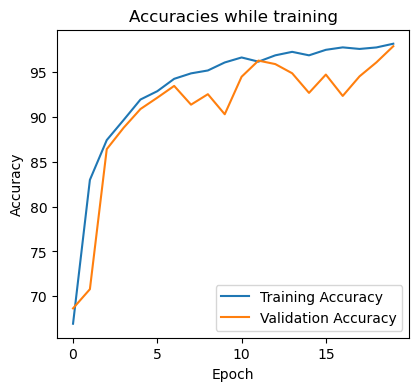

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies while training')
plt.show()

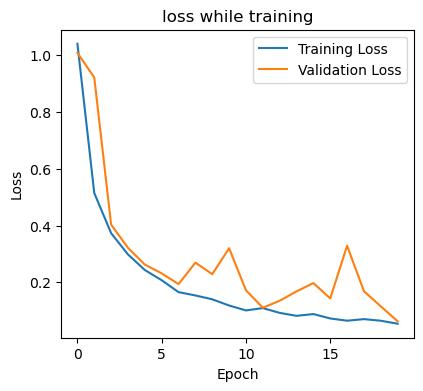

In [13]:
# Plot the training and validation loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('loss while training')
plt.show()

In [14]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    total_test_loss = 0
    total_correct = 0
    total_images = 0
    # Use tqdm to add a progress bar
    for images, labels in tqdm(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_test_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_images += labels.size(0)
    test_loss = total_test_loss / total_images
    accuracy = total_correct / total_images
    print('Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(test_loss, accuracy*100))
    wandb.log({'Test Loss': test_loss, 'Test Accuracy':accuracy*100})

100%|██████████| 49/49 [00:13<00:00,  3.68it/s]

Test Loss: 0.0582, Test Accuracy: 97.94%


In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
pred_labels = []

# Loop over the validation dataset in batches
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    # Predict the labels
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Append the true and predicted labels to the corresponding lists
    true_labels.extend(labels.tolist())
    pred_labels.extend(predicted.tolist())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Compute precision, recall, and F-score
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')
f_score = f1_score(true_labels, pred_labels, average='macro')

print('Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}'.format(precision, recall, f_score))
wandb.log({'Precision': precision, 'Recall': recall, 'F-score':f_score})

Precision: 0.9828, Recall: 0.9813, F-score: 0.9818


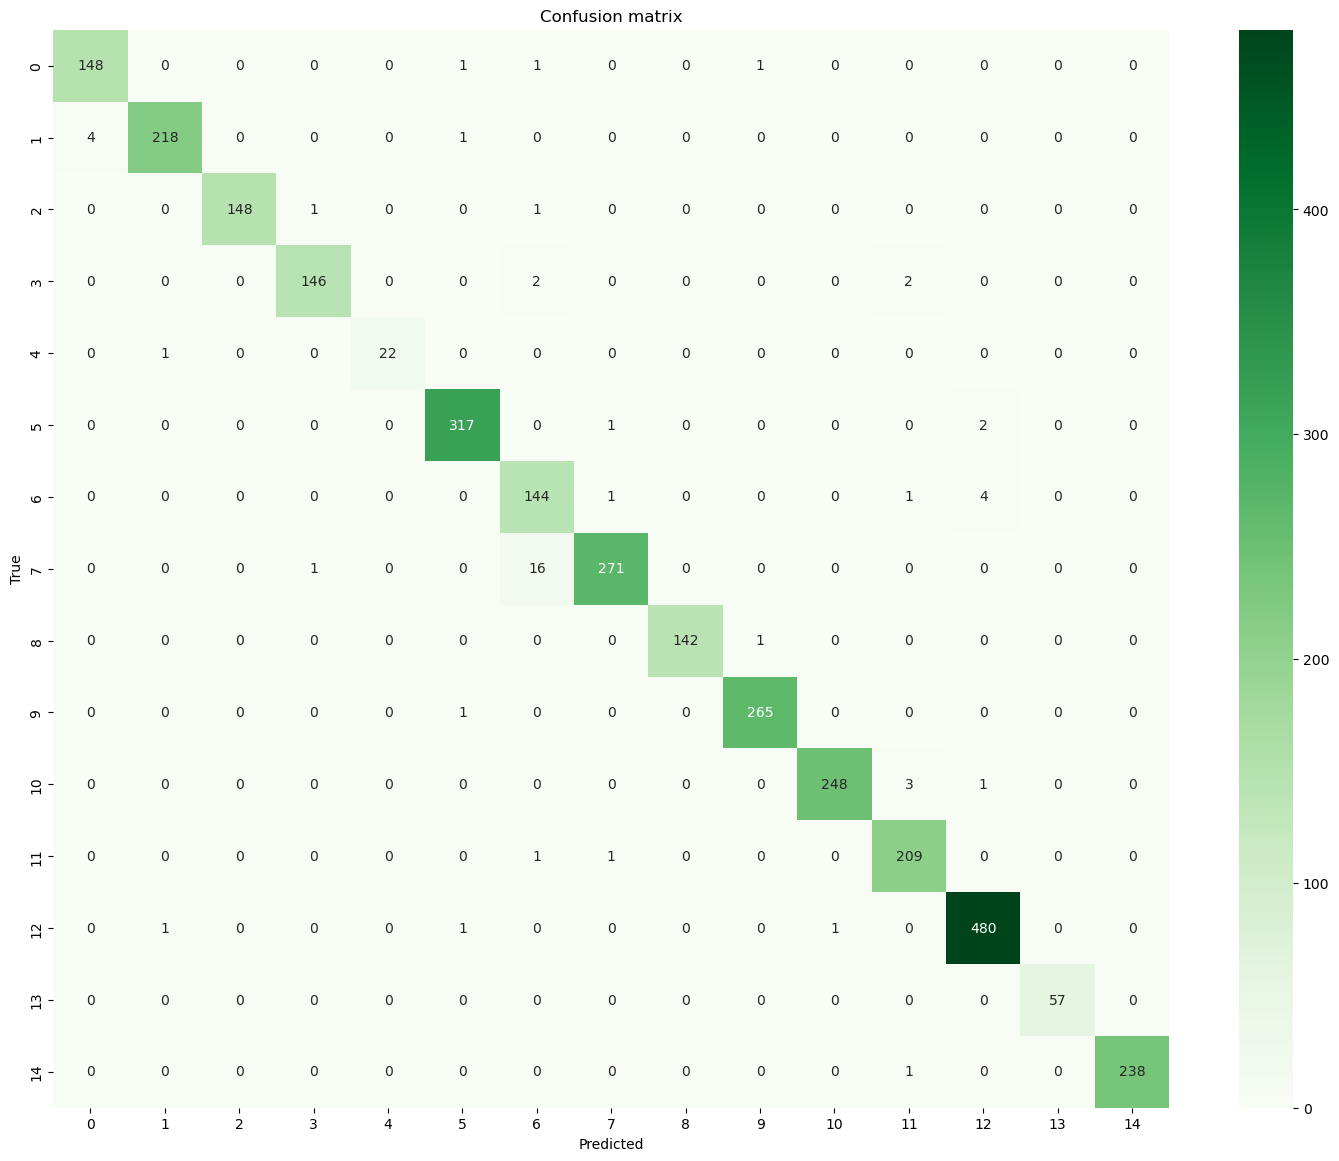

In [16]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [17]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'dataset2')

In [18]:
torch.save(model.state_dict(), 'best_model.pt')
print("model saved")

model saved


In [19]:
run.finish()

Training Accuracy,▁▅▆▆▇▇▇▇▇███████████
F-score,▁
Precision,▁
Recall,▁
Test Accuracy,▁
Test Loss,▁
Training Loss,█▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Validation Accuracy,▁▂▅▆▆▇▇▆▇▆▇██▇▇▇▇▇██
Validation Loss,█▇▄▃▂▂▂▃▂▃▂▁▂▂▂▂▃▂▁▁
Training Accuracy,0.98139
F-score,0.98181
